# Algorithm Visualization

This notebook generates all the images of the paper. Also some extra figures are provided.

In [11]:
# packages and plot settings
from utils.load_data import load_case, load_measurement, load_load_pv, load_dataset
from models.model import LSTM_AE
from models.evaluation import Evaluation
import torch
import matplotlib.pyplot as plt
from configs.config import sys_config
from configs.nn_setting import nn_setting
import numpy as np
from tqdm import tqdm
from models.dataset import scaler
from matplotlib import cm

# Plot options
plt.rcParams['lines.linewidth'] = 3.5
plt.rcParams['font.size'] = 16
plt.rcParams['font.weight'] = 'bold'
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['legend.loc'] = 'lower right'
plt.rcParams['legend.fontsize'] = 16

name = sys_config['case_name']

In [2]:
# Load cases, measurement, and load
case_class = load_case()

lstm_ae = LSTM_AE()
lstm_ae.load_state_dict(torch.load(nn_setting['model_path'], map_location=torch.device(nn_setting['device'])))
dd_detector = Evaluation(case_class=case_class)  # Instance the data-driven detector
scaler_ = scaler()     

z_noise_summary, v_est_summary = load_measurement()
load_active, load_reactive, pv_active_, pv_reactive_ = load_load_pv()
test_dataloader_scaled, test_dataloader_unscaled, valid_dataloader_scaled, valid_dataloader_unscaled = load_dataset()

metric_fpr = np.load('metric/case14/metric_fpr_0.5.npy', allow_pickle=True).item()
print(len(metric_fpr['residual_BDD']))
print(metric_fpr.keys())

metric_ddd = np.load('metric/case14/metric_ddd_0.005_0.1_0.1_1000_50.npy', allow_pickle=True).item()
metric_ddd_no_physics = np.load('metric/case14/metric_ddd_no_physics_0.005_0.1_0.1_1000_50.npy', allow_pickle=True).item()
print("metric dd keys:", metric_ddd.keys())

metric_event_00001 = np.load('metric/case14/metric_event_trigger_mode_0_0.0001.npy', allow_pickle=True).item()
metric_event_0001 = np.load('metric/case14/metric_event_trigger_mode_0_0.001.npy', allow_pickle=True).item()
metric_event_0005 = np.load('metric/case14/metric_event_trigger_mode_0_0.005.npy', allow_pickle=True).item()
metric_event_001 = np.load('metric/case14/metric_event_trigger_mode_0_0.01.npy', allow_pickle=True).item()
metric_event_002 = np.load('metric/case14/metric_event_trigger_mode_0_0.02.npy', allow_pickle=True).item()
metric_event_003 = np.load('metric/case14/metric_event_trigger_mode_0_0.03.npy', allow_pickle=True).item()

print("metric event keys: ", metric_event_001.keys())

# Into a dictionary
metric_event = {}
metric_event['0.0001'] = metric_event_00001
metric_event['0.001'] = metric_event_0001
metric_event['0.005'] = metric_event_0005
metric_event['0.01'] = metric_event_001
metric_event['0.02'] = metric_event_002
metric_event['0.03'] = metric_event_003

att_keys = metric_ddd['TP_DDD'].keys()
print("att keys: ", att_keys)
"""
robust MTD
"""
metric_robust_with_attack_event = np.load('metric/case14/metric_robust_0_with_attack_event_1.npy', allow_pickle=True).item()
metric_robust_with_attack_perio = np.load('metric/case14/metric_robust_0_with_attack_event_0.npy', allow_pickle=True).item()
metric_robust_no_attack = np.load('metric/case14/metric_robust_0_no_attack.npy', allow_pickle=True).item()

"""
max rank MTD
"""
metric_max_rank_with_attack_event = np.load('metric/case14/metric_max_rank_0_with_attack_event_1.npy', allow_pickle=True).item()
metric_max_rank_with_attack_perio = np.load('metric/case14/metric_max_rank_0_with_attack_event_0.npy', allow_pickle=True).item()
metric_max_rank_no_attack = np.load('metric/case14/metric_max_rank_0_no_attack.npy', allow_pickle=True).item()

va_strength = ["0.0001", "0.001", "0.005", "0.01", "0.02", "0.03"]
omega_stage_one = [np.load(f"metric/case14/omega_stage_one_{va}.npy", allow_pickle=True) for va in va_strength]
omega_stage_two = [np.load(f"metric/case14/omega_stage_two_{va}.npy", allow_pickle=True) for va in va_strength]

xtickslabel = ['(1,0.2)', '(1,0.3)','(2,0.2)','(2,0.3)','(3,0.2)','(3,0.3)']

Using cuda device
LSTM_AE(
  (encoder): Encoder(
    (LSTM_layers): ModuleList(
      (0): LSTM(68, 48, batch_first=True)
      (1): LSTM(48, 29, batch_first=True)
      (2): LSTM(29, 10, batch_first=True)
    )
  )
  (decoder): Decoder(
    (LSTM_layers): ModuleList(
      (0): LSTM(10, 10, batch_first=True)
      (1): LSTM(10, 29, batch_first=True)
      (2): LSTM(29, 48, batch_first=True)
    )
    (output_layer): Linear(in_features=48, out_features=68, bias=True)
  )
)
The LSTM-AE detection threshold: [0.00366737 0.00385486 0.00409092 0.00433188 0.00463983 0.00500853
 0.00549572 0.00609777 0.00675582 0.00826172 0.0145775 ]
z noise size: (35136, 68)
v est size: (35136, 14)
test dataset size scaled: 7023
test dataset size unscaled: 7022
valid dataset size scaled: 7022
valid dataset size unscaled: 7021
2880
dict_keys(['residual_BDD', 'residual_DDD', 'cost_no_mtd', 'cost_with_mtd', 'x_mtd_ratio', 'post_mtd_opf_converge', 'stage_one_time', 'stage_two_time', 'recover_time', 'varrho_summa

In [38]:
metric_ddd.keys()

dict_keys(['TP_DDD', 'att_strength', 'FP_DDD', 'recover_deviation', 'pre_deviation', 'ite_summary', 'recover_time', 'residual_bdd', 'residual_ddd'])

In [39]:
metric_ddd['residual_bdd'].keys(), metric_ddd['residual_ddd'].keys()

(dict_keys(['(1, 0.2)', '(1, 0.3)', '(2, 0.2)', '(2, 0.3)', '(3, 0.2)', '(3, 0.3)']),
 dict_keys(['(1, 0.2)', '(1, 0.3)', '(2, 0.2)', '(2, 0.3)', '(3, 0.2)', '(3, 0.3)']))

## Bad Data Detection

The FPR of BDD: 0.021361435488464826


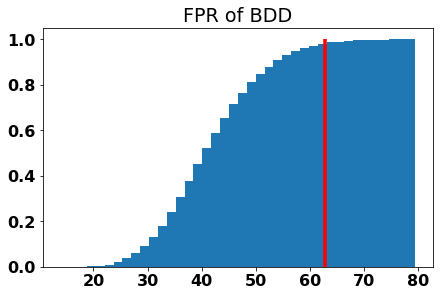

In [17]:
residual_summary = []
for _, (idx, input, v_est_pre, v_est_last) in enumerate(test_dataloader_unscaled):
    # idx is the index in test_dataloader_unscaled
    # Convert the format
    v_est_last = v_est_last.numpy().flatten()
    z_noise_last = np.expand_dims(input.numpy()[0,-1],1)
    residual = case_class.bdd_residual(z_noise_last, v_est_last)
    residual_summary.append(residual)

FPR_BDD = np.sum(residual_summary >= case_class.bdd_threshold)/len(residual_summary)
print(f'The FPR of BDD: {FPR_BDD}')
plt.figure()
plt.hist(residual_summary, bins=40, density=True, cumulative=True)
plt.vlines(x = case_class.bdd_threshold, ymin = 0, ymax = 1, colors='red')
plt.title('FPR of BDD')
plt.show()

7022it [00:03, 2037.37it/s]


The TPR of BDD: 0.021361435488464826


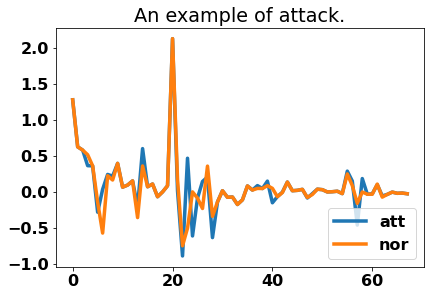

In [18]:
# Define attack specification
ang_no = 2      # Attack numbers on phase angle
mag_no = 0      # Attack numbers on magnitude
ang_str = 0.2   # Maximum attack strength on phase angle
mag_str = 0     # Maximum attack strength on magnitude
residual_summary = []
for _, (idx, input, v_est_pre, v_est_last) in tqdm(enumerate(test_dataloader_unscaled)):
    # Convert the format
    v_est_last = v_est_last.flatten()
    # Generate the attack
    z_att_noise, v_att_est_last = case_class.gen_fdi_att_dd(z_noise=input, v_est_last=v_est_last, ang_no=ang_no, mag_no=mag_no, ang_str=ang_str, mag_str=mag_str)
    z_att_noise_last = np.expand_dims(z_att_noise[0,-1], 1)
    residual = case_class.bdd_residual(z_att_noise_last, v_att_est_last)
    residual_summary.append(residual)
TPR_BDD = np.sum(residual_summary >= case_class.bdd_threshold)/len(residual_summary)
print(f'The TPR of BDD: {TPR_BDD}')
# Visualize the attacked measurement
plt.figure()
plt.plot(z_att_noise[0,-1].numpy(), label = 'att')
plt.plot(input[0,-1].numpy(), label = 'nor')
plt.title('An example of attack.')
plt.legend()
plt.show()

## Data Driven Detector

### FPR and TPR of DDD

In [19]:
FP_DD_summary = np.zeros(len(dd_detector.quantile))
for input, output in test_dataloader_scaled:
    encoded, decoded, loss_lattent, loss_recons = dd_detector.evaluate(input)
    for idx, quantile in enumerate(dd_detector.quantile):
        if loss_recons >= dd_detector.ae_threshold[idx]:
            FP_DD_summary[idx] += 1
FPR_DD_summary = FP_DD_summary/len(test_dataloader_scaled.dataset)
print(f'DD FPR: {FPR_DD_summary}')

DD FPR: [0.26156913 0.24021074 0.22013385 0.20176563 0.18254307 0.15605866
 0.12857753 0.10195073 0.07888367 0.05111776 0.00711946]


In [50]:
# Attack list
ang_no_list = [1,2,3]
mag_no = 0
ang_str_list = [0.2,0.3]
mag_str = 0

ROC_dict = {}

for ang_no in ang_no_list:
    # Attack number
    for ang_str in ang_str_list:
        # Attack strength
        
        residual = []
        for _, (idx, input, v_est_pre, v_est_last) in tqdm(enumerate(test_dataloader_unscaled)):
            # Convert data format
            v_est_last = v_est_last.flatten()
            # Attack
            z_att_noise, v_att_est_last = case_class.gen_fdi_att_dd(z_noise=input, v_est_last=v_est_last, ang_no=ang_no, mag_no=mag_no, ang_str=ang_str, mag_str=mag_str) # z_attack_noise: (1,sample_length,feature_size)
            # Scale
            z_att_noise_scale = scaler_(z_att_noise)
            encoded, decoded, _, loss_recons = dd_detector.evaluate(z_att_noise_scale)
            residual.append(loss_recons)
        
        TPR_DDD_summary = []
        # For each of the threshold, find the detection accuracy
        for i, quantile in enumerate(dd_detector.quantile):
            TPR_DDD = np.sum(residual >= dd_detector.ae_threshold[i])/len(residual)
            TPR_DDD_summary.append(TPR_DDD)
            
        ROC_dict[f'({ang_no},{ang_str})'] = TPR_DDD_summary

7022it [00:12, 542.13it/s]
7022it [00:12, 547.96it/s]
7022it [00:12, 549.01it/s]
7022it [00:12, 545.29it/s]
7022it [00:12, 544.56it/s]
7022it [00:12, 545.34it/s]


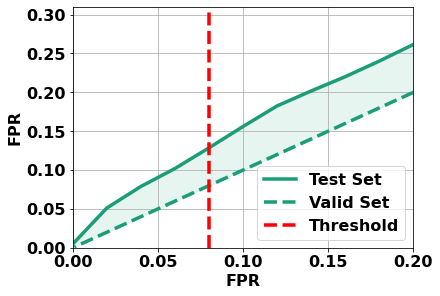

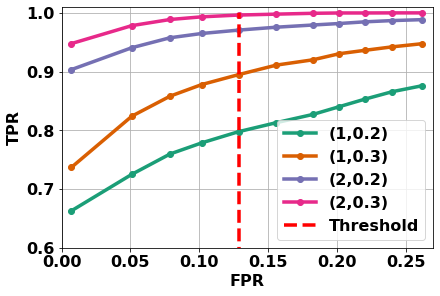

The validation set FPR: 0.07999999999999996
The false positive rate is: 0.12845343207063514
[0.7905155226431216, 0.893335232127599, 0.9713756764454571, 0.9953004841925377, 0.9971518086015381, 1.0]


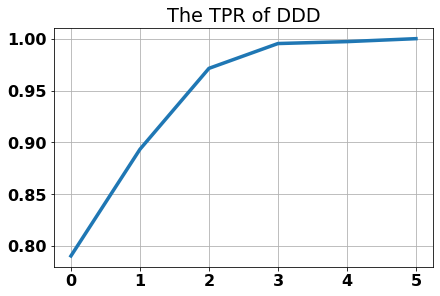

minimum attack strength: [0.00024802 0.00071963 0.0097872  0.01741122 0.02052069 0.03389008]


In [51]:
plt.figure()
plt.plot(1-np.array(dd_detector.quantile), FPR_DD_summary, label = 'Test Set', color = cm.Dark2(0))
plt.plot(1-np.array(dd_detector.quantile), 1-np.array(dd_detector.quantile), label = 'Valid Set', linestyle = 'dashed', color = cm.Dark2(0))
plt.vlines(x = 1-dd_detector.quantile[dd_detector.quantile_idx], ymin = 0, ymax = 1, colors = 'red', linestyles='--', label='Threshold')
plt.xlabel('FPR')
plt.ylabel('FPR')
plt.fill_between(1-np.array(dd_detector.quantile), 1-np.array(dd_detector.quantile), FPR_DD_summary, color = cm.Dark2(0), alpha = 0.1)
plt.legend()
plt.ylim([0.0,0.31])
plt.yticks(np.arange(0,0.31,0.05))
plt.xlim([0.0,0.2])
plt.grid()
plt.savefig(f'figures/{sys_config["case_name"]}/false_positive.pdf')
plt.show()

# ROC curve
plt.figure()
for idx, key in enumerate(ROC_dict.keys()):
    plt.plot(FPR_DD_summary, ROC_dict[key], label = key, color = cm.Dark2(idx), linestyle = '-', marker = 'o')
    if idx == 3:
        break
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.vlines(x = FPR_DD_summary[dd_detector.quantile_idx], ymin = 0, ymax = 1, colors = 'red', linestyles='--', label='Threshold')
plt.legend()
plt.ylim([0.6,1.01])
plt.xlim([0,0.27])
plt.savefig(f'figures/{sys_config["case_name"]}/roc.pdf')
plt.show()

print(f'The validation set FPR: {1-dd_detector.quantile[dd_detector.quantile_idx]}')

print(f'The false positive rate is: {np.sum(metric_ddd["FP_DDD"])/len(metric_ddd["FP_DDD"])}')
TPR_DDD = []
attack_str = []
for key in metric_ddd['TP_DDD'].keys():
    TPR_DDD.append(np.sum(metric_ddd['TP_DDD'][key])/len(metric_ddd['TP_DDD'][key]))
    attack_str.append(metric_ddd['att_strength'][key])
print(TPR_DDD)

plt.plot(TPR_DDD)
plt.title('The TPR of DDD')
plt.grid()
plt.show()

# plt.figure()
# plt.boxplot(attack_str)
# plt.title('attack strength')
# plt.grid()
# plt.show()

print(f'minimum attack strength: {np.min(attack_str,1)}')

## Attack Identification

In [3]:
xtickslabel = ['(1,0.2)', '(1,0.3)','(2,0.2)','(2,0.3)','(3,0.2)','(3,0.3)']

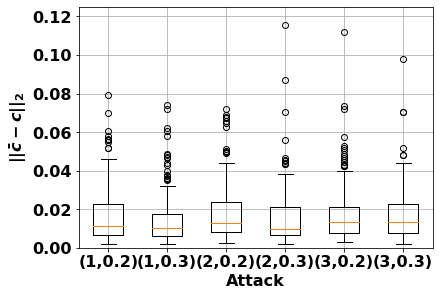

The average recovery time is 1.4784620472374865


In [17]:
plt.figure()
plot_list = [metric_ddd['recover_deviation'][key] for key in metric_ddd['recover_deviation'].keys()]
plt.boxplot(plot_list, widths= 0.5, sym = 'o')
plt.ylim((0,0.125))
# plt.ylim((0,0.3))
plt.xticks(range(1,7), xtickslabel)
plt.grid(True)
plt.ylabel(r'$||\bar{c}-c||_2$')
plt.xlabel('Attack')
plt.savefig(f'figures/{sys_config["case_name"]}/recovery_acc.pdf')
plt.show()
recover_time = [np.mean(metric_ddd['recover_time'][key]) for key in metric_ddd['recover_time'].keys()]
print(f'The average recovery time is {np.mean(recover_time)}')

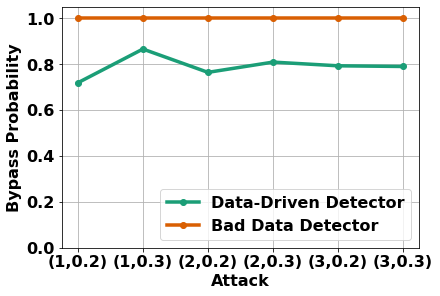

In [21]:
bypass_ddd_rate_physics = [np.sum(metric_ddd['residual_ddd'][key] < dd_detector.ae_threshold[dd_detector.quantile_idx])/len(metric_ddd['residual_ddd'][key]) for key in metric_ddd['residual_ddd'].keys()]
bypass_bdd_rate_physics = np.ones(len(bypass_ddd_rate_physics))
plt.plot(bypass_ddd_rate_physics,marker = 'o', color = cm.Dark2(0), label = 'Data-Driven Detector')
plt.plot(bypass_bdd_rate_physics,marker = 'o', color = cm.Dark2(1), label = 'Bad Data Detector')
plt.ylim((0,1.05))
plt.legend()
plt.xticks(range(0,6), xtickslabel)
plt.ylabel('Bypass Probability')
plt.xlabel('Attack')
plt.grid()
plt.savefig(f'figures/{sys_config["case_name"]}/bypass_ddd.pdf')
plt.show()

### Evaluate the attack identification algorithm without physics information

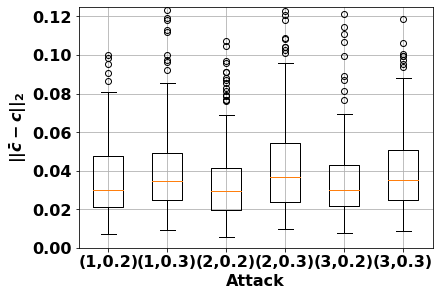

In [19]:
metric_ddd_no_physics.keys()
plt.figure()
plot_list_no_physics = [metric_ddd_no_physics['recover_deviation'][key] for key in metric_ddd_no_physics['recover_deviation'].keys()]
plt.boxplot(plot_list_no_physics, widths= 0.5, sym = 'o')
plt.ylim((0,0.125))
plt.xticks(range(1,7), xtickslabel)
plt.grid(True)
plt.ylabel(r'$||\bar{c}-c||_2$')
plt.xlabel('Attack')
plt.savefig(f'figures/{sys_config["case_name"]}/recovery_acc_no_physics.pdf')
plt.show()

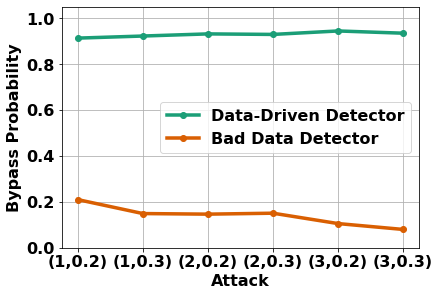

In [22]:
bypass_ddd_rate_no_physics = [np.sum(metric_ddd_no_physics['residual_ddd'][key] < dd_detector.ae_threshold[dd_detector.quantile_idx])/len(metric_ddd_no_physics['residual_ddd'][key]) for key in metric_ddd_no_physics['residual_ddd'].keys()]
bypass_bdd_rate_no_physics = [np.sum(metric_ddd_no_physics['residual_bdd'][key] < case_class.bdd_threshold)/len(metric_ddd_no_physics['residual_bdd'][key]) for key in metric_ddd_no_physics['residual_ddd'].keys()]

# bypass_bdd_rate = np.ones(len(bypass_ddd_rate))
# bypass_ddd_rate
plt.plot(bypass_ddd_rate_no_physics,marker = 'o', color = cm.Dark2(0), label = 'Data-Driven Detector')
plt.plot(bypass_bdd_rate_no_physics,marker = 'o', color = cm.Dark2(1), label = 'Bad Data Detector')
plt.ylim((0,1.05))
plt.legend(loc = 'best')
plt.xticks(range(0,6), xtickslabel)
plt.ylabel('Bypass Probability')
plt.xlabel('Attack')
plt.grid()
plt.savefig(f'figures/{sys_config["case_name"]}/bypass_ddd_no_physics.pdf')
plt.show()

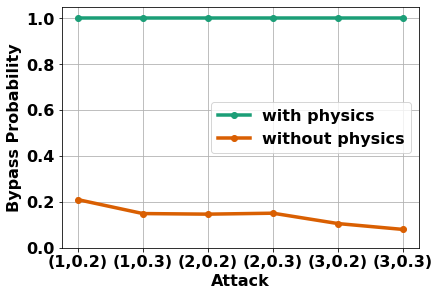

In [35]:
plt.figure()
plt.plot(bypass_bdd_rate_physics,marker = 'o', color = cm.Dark2(0), label = 'with physics')
plt.plot(bypass_bdd_rate_no_physics,marker = 'o', color = cm.Dark2(1), label = 'without physics')
plt.ylim((0,1.05))
plt.legend(loc = 'best')
plt.xticks(range(0,6), xtickslabel)
plt.ylabel('Bypass Probability')
plt.xlabel('Attack')
plt.grid()
plt.show()

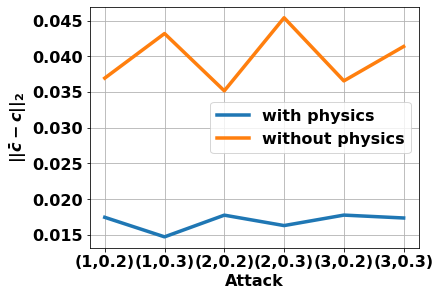

In [36]:
ave_physics = [np.mean(plot_list[i]) for i in range(len(plot_list))]
ave_no_physics = [np.mean(plot_list_no_physics[i]) for i in range(len(plot_list_no_physics))]

plt.figure()
plt.plot(ave_physics, label = 'with physics')
plt.plot(ave_no_physics, label = 'without physics')
plt.legend(loc = 'best')
plt.xticks(range(0,6), xtickslabel)
plt.ylabel(r'$||\bar{c}-c||_2$')
plt.xlabel('Attack')
plt.grid()
plt.show()

## Event Trigger Detector

### Baseline Algorithm

In [55]:
def find_baseline_performance(data_dict):
    
    ADP_summary = []
    DHP_summary = []
    COST_summary = []
    X_summary = []
    
    ADP_AFTER_DDD_summary = []
    DHP_AFTER_DDD_summary = []
    X_AFTER_DDD_summary = []
    COST_AFTER_DDD_summary = []
    
    for key in xtickslabel:
        total_no = len(data_dict['mtd_eff'][key])
        
        # ADP
        ADP = (np.array(data_dict['mtd_eff'][key]) >= case_class.bdd_threshold).sum() / total_no * 100
        ADP_summary.append(ADP)
        
        # ADP after DDD raises an alarm: only for periodic
        ddd_posi_index = np.where(np.array(data_dict['mtd_eff'][key]) > 0)[0]  # index of attack that is detected by DDD
        ADP_AFTER_DDD = (np.array(data_dict['mtd_eff'][key])[ddd_posi_index] >= case_class.bdd_threshold).sum() / len(ddd_posi_index) * 100
        
        ADP_AFTER_DDD_summary.append(ADP_AFTER_DDD)
        
        # DHP
        DHP = (data_dict['mtd_hidden'][key] <= case_class.bdd_threshold).sum() / total_no * 100
        DHP_summary.append(DHP)
        
        DHP_AFTER_DDD = (np.array(data_dict['mtd_hidden'][key])[ddd_posi_index] <= case_class.bdd_threshold).sum() / len(ddd_posi_index) * 100
        DHP_AFTER_DDD_summary.append(DHP_AFTER_DDD)
        
        # Average Cost
        cost_no_mtd = np.array(data_dict['cost_no_mtd'][key])
        cost_with_mtd = np.array(data_dict['cost_with_mtd'][key])
        cost_increase = np.mean((cost_with_mtd - cost_no_mtd)/cost_no_mtd) * 100
        COST_summary.append(cost_increase)
        
        COST_AFTER_DDD = np.sort((cost_with_mtd[ddd_posi_index] - cost_no_mtd[ddd_posi_index])/cost_no_mtd[ddd_posi_index])[-2] * 100
        COST_AFTER_DDD_summary.append(COST_AFTER_DDD)
        
        # Average reactance perturbation
        x_ratio = data_dict['x_ratio'][key]
        x_ratio_ave = np.mean([reactance.mean() for reactance in x_ratio]) * 100
        X_summary.append(x_ratio_ave)
        X_AFTER_DDD = np.mean([reactance.mean() for idx, reactance in enumerate(x_ratio) if idx in ddd_posi_index]) * 100
        X_AFTER_DDD_summary.append(X_AFTER_DDD)
        
        print(key, 'ADP', round(ADP,3), 
            'DHP', round(DHP,3), 
            'cost increase', round(cost_increase,3), 
            'x_ratio_ave', round(x_ratio_ave,3), 
            'ADP_AFTER_DDD', round(ADP_AFTER_DDD,3), 
            'DHP_AFTER_DDD', round(DHP_AFTER_DDD,3),
            'X_AFTER_DDD', round(X_AFTER_DDD,3),
            'COST_AFTER_DDD', round(COST_AFTER_DDD,3))
            
    print('total number: ', total_no)
    
    return ADP_AFTER_DDD_summary, DHP_AFTER_DDD_summary, X_AFTER_DDD_summary, COST_AFTER_DDD_summary, ADP_summary, DHP_summary, COST_summary, X_summary

def find_average_no_attack(data_dict):
    x_ratio_ave = np.mean([reactance.mean() for reactance in data_dict['x_ratio']]) * 100
    
    cost_no_mtd = np.array(data_dict['cost_no_mtd'])
    cost_with_mtd = np.array(data_dict['cost_with_mtd'])
    cost_increase = np.mean((cost_with_mtd - cost_no_mtd)/cost_no_mtd) * 100
    
    # Average reactance perturbation
    print('cost increase', round(cost_increase,3), 'x_ratio_ave', round(x_ratio_ave,3))

In [56]:
print('max rank event')
ADP_AFTER_DDD_max_rank, DHP_AFTER_DDD_max_rank, X_AFTER_DDD_max_rank, COST_AFTER_DDD_max_rank, ADP_summary_max_rank_event, DHP_summary_max_rank_event, COST_summary_max_rank_event, X_summary_max_rank_event = find_baseline_performance(metric_max_rank_with_attack_event)

print('max rank perio')
_, _, _, _, ADP_summary_max_rank_perio, DHP_summary_max_rank_perio, COST_summary_max_rank_perio, X_summary_max_rank_perio = find_baseline_performance(metric_max_rank_with_attack_perio)

print('max rank no attack')
find_average_no_attack(metric_max_rank_no_attack)

print('robust event')
ADP_AFTER_DDD_robust, DHP_AFTER_DDD_robust, X_AFTER_DDD_robust, COST_AFTER_DDD_robust, ADP_summary_robust_event, DHP_summary_robust_event, COST_summary_robust_event, X_summary_robust_event = find_baseline_performance(metric_robust_with_attack_event)

print('robust perio')
_, _, _, _, ADP_summary_robust_perio, DHP_summary_robust_perio, COST_summary_robust_perio, X_summary_robust_perio = find_baseline_performance(metric_robust_with_attack_perio)

print('robust no attack')
find_average_no_attack(metric_robust_no_attack)

max rank event
(1,0.2) ADP 65.1 DHP 19.2 cost increase 0.141 x_ratio_ave 22.297 ADP_AFTER_DDD 80.569 DHP_AFTER_DDD 0.0 X_AFTER_DDD 27.595 COST_AFTER_DDD 1.03
(1,0.3) ADP 79.7 DHP 11.7 cost increase 0.161 x_ratio_ave 24.115 ADP_AFTER_DDD 90.26 DHP_AFTER_DDD 0.0 X_AFTER_DDD 27.31 COST_AFTER_DDD 1.084
(2,0.2) ADP 90.809 DHP 2.198 cost increase 0.157 x_ratio_ave 26.949 ADP_AFTER_DDD 92.85 DHP_AFTER_DDD 0.0 X_AFTER_DDD 27.554 COST_AFTER_DDD 1.107
(2,0.3) ADP 98.104 DHP 0.399 cost increase 0.173 x_ratio_ave 27.376 ADP_AFTER_DDD 98.497 DHP_AFTER_DDD 0.0 X_AFTER_DDD 27.485 COST_AFTER_DDD 1.073
(3,0.2) ADP 97.605 DHP 0.798 cost increase 0.174 x_ratio_ave 27.24 ADP_AFTER_DDD 98.39 DHP_AFTER_DDD 0.0 X_AFTER_DDD 27.459 COST_AFTER_DDD 1.018
(3,0.3) ADP 99.9 DHP 0.0 cost increase 0.175 x_ratio_ave 27.533 ADP_AFTER_DDD 99.9 DHP_AFTER_DDD 0.0 X_AFTER_DDD 27.533 COST_AFTER_DDD 1.128
total number:  1002
max rank perio
(1,0.2) ADP 71.9 DHP 0.0 cost increase 0.172 x_ratio_ave 27.539 ADP_AFTER_DDD 71.9 DHP

### Compare different uncertainty

In [57]:
# Stage one fail ratio
# When the uncertainty increases, the fail rate increase
print('Fail rate.')
for key in metric_event.keys():
    fail = [np.sum(metric_event[key]['fail'][key_])/len(metric_event[key]['fail'][key_]) for key_ in att_keys]
    print(f'{key}: {fail}')

Fail rate.
0.0001: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.001: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.005: [0.006289308176100629, 0.0, 0.005076142131979695, 0.0, 0.0, 0.0]
0.01: [0.012738853503184714, 0.005813953488372093, 0.0, 0.0, 0.0, 0.0]
0.02: [0.019867549668874173, 0.010638297872340425, 0.015463917525773196, 0.0, 0.005025125628140704, 0.0]
0.03: [0.025, 0.03932584269662921, 0.08247422680412371, 0.005, 0.025, 0.0]


In [58]:
# TPR
TPR_DDD = []
for key in metric_event_001['TP_DDD'].keys():
    TPR_DDD.append(np.array(metric_event_001['TP_DDD'][key]).sum()/len(metric_event_001['TP_DDD'][key]))

print(f"The TPR of DDD: ", TPR_DDD)

The TPR of DDD:  [0.785, 0.86, 0.96, 1.0, 1.0, 1.0]


In [59]:
# Detection effectiveness
print('MTD Efffectiveness')
print('Stage One')
mtd_stage_one_eff = []
for i, key in enumerate(metric_event.keys()):
    mtd_stage_one_eff.append([np.sum(metric_event[key]['mtd_stage_one_eff'][key_] >= case_class.bdd_threshold)/len(metric_event[key]['mtd_stage_one_eff'][key_]) for key_ in att_keys])
    print(f'{key}: {mtd_stage_one_eff[i]}')
# Detection effectiveness
print('Stage Two')
mtd_stage_two_eff = []
for i,key in enumerate(metric_event.keys()):
    mtd_stage_two_eff.append([np.sum(metric_event[key]['mtd_stage_two_eff'][key_] >= case_class.bdd_threshold)/len(metric_event[key]['mtd_stage_two_eff'][key_]) for key_ in att_keys])
    print(f'{key}: {mtd_stage_two_eff[i]}')

MTD Efffectiveness
Stage One
0.0001: [0.9745222929936306, 0.9944444444444445, 1.0, 1.0, 1.0, 1.0]
0.001: [0.9803921568627451, 0.9775280898876404, 0.9947916666666666, 1.0, 1.0, 1.0]
0.005: [0.9685534591194969, 0.9943820224719101, 0.9949238578680203, 1.0, 1.0, 1.0]
0.01: [0.9808917197452229, 0.9941860465116279, 1.0, 1.0, 1.0, 1.0]
0.02: [0.9801324503311258, 0.9840425531914894, 0.9896907216494846, 1.0, 1.0, 1.0]
0.03: [0.94375, 0.9775280898876404, 0.979381443298969, 0.995, 1.0, 1.0]
Stage Two
0.0001: [0.9363057324840764, 0.9555555555555556, 0.9637305699481865, 0.99, 0.985, 0.99]
0.001: [0.9738562091503268, 0.9606741573033708, 0.9739583333333334, 0.9748743718592965, 0.99, 0.995]
0.005: [0.949685534591195, 0.9606741573033708, 0.9847715736040609, 0.99, 1.0, 0.995]
0.01: [0.9617834394904459, 0.9825581395348837, 0.9947916666666666, 1.0, 1.0, 1.0]
0.02: [0.9668874172185431, 0.9893617021276596, 0.9845360824742269, 1.0, 1.0, 1.0]
0.03: [0.9375, 0.9775280898876404, 0.9845360824742269, 0.995, 1.0, 

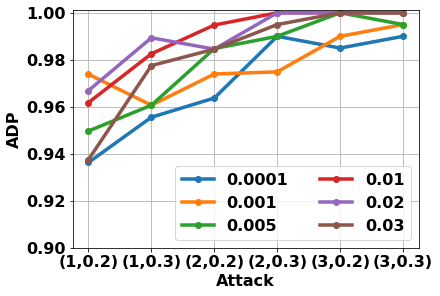

In [60]:
for i in range(len(mtd_stage_two_eff[0])):
    plt.plot(mtd_stage_two_eff[i], label = list(metric_event)[i], marker = 'o')
plt.legend(ncol = 2)
plt.ylim((0.9,1.001))
plt.xticks(range(0,6), xtickslabel)
plt.ylabel('ADP')
plt.xlabel('Attack')
plt.grid()
plt.savefig(f'figures/{sys_config["case_name"]}/va_eff.pdf')
plt.show()

In [61]:
# Detection Hiddenness
print('MTD Hiddenness')
print('Stage One')
mtd_stage_one_hidden = []
for i, key in enumerate(metric_event.keys()):
    mtd_stage_one_hidden.append([np.sum(metric_event[key]['mtd_stage_one_hidden'][key_] <= case_class.bdd_threshold)/len(metric_event[key]['mtd_stage_one_hidden'][key_]) for key_ in att_keys])
    print(f'{key}: {mtd_stage_one_hidden[i]}')

# Detection Hiddenness
print('Stage Two')
mtd_stage_two_hidden = []
for i, key in enumerate(metric_event.keys()):
    mtd_stage_two_hidden.append([np.sum(metric_event[key]['mtd_stage_two_hidden'][key_] <= case_class.bdd_threshold)/len(metric_event[key]['mtd_stage_two_hidden'][key_]) for key_ in att_keys])
    print(f'{key}: {mtd_stage_two_hidden[i]}')

MTD Hiddenness
Stage One
0.0001: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.001: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.005: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.01: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.02: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.03: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Stage Two
0.0001: [0.4267515923566879, 0.5555555555555556, 0.5803108808290155, 0.73, 0.78, 0.865]
0.001: [0.42483660130718953, 0.6348314606741573, 0.59375, 0.6884422110552764, 0.705, 0.87]
0.005: [0.389937106918239, 0.5786516853932584, 0.4263959390862944, 0.72, 0.6, 0.8]
0.01: [0.19745222929936307, 0.5, 0.3072916666666667, 0.67, 0.45, 0.81]
0.02: [0.046357615894039736, 0.35106382978723405, 0.13402061855670103, 0.5454545454545454, 0.21105527638190955, 0.695]
0.03: [0.01875, 0.19662921348314608, 0.030927835051546393, 0.28, 0.115, 0.51]


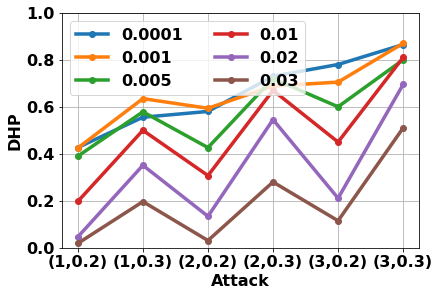

In [62]:
for i in range(len(mtd_stage_two_hidden[0])):
    plt.plot(mtd_stage_two_hidden[i], label = list(metric_event)[i], marker = 'o')
plt.legend(ncol = 2, loc = 'upper left')
plt.ylim((0.,1))
plt.xticks(range(0,6), xtickslabel)
plt.ylabel('DHP')
plt.xlabel('Attack')
plt.grid()
plt.savefig(f'figures/{sys_config["case_name"]}/va_hid.pdf')
plt.show()

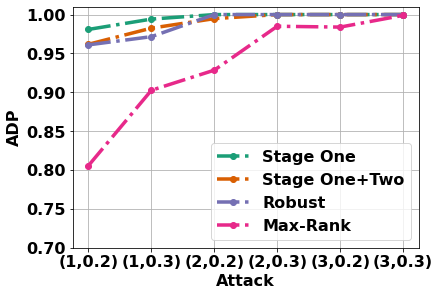

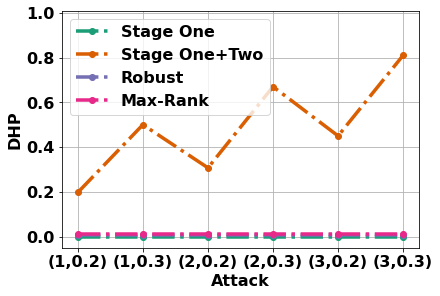

In [75]:
idx = 3

# robust_mtd_eff = [np.sum(metric_robust['mtd_eff'][key] >= case_class.bdd_threshold)/len(metric_robust['mtd_eff'][key]) for key in att_keys]
# print(f'robust mtd eff: {robust_mtd_eff}')
# robust_mtd_hidden = np.sum(metric_robust['mtd_hidden'] <= case_class.bdd_threshold)/len(metric_robust['mtd_hidden'])
# print(f'robust mtd hidden: {robust_mtd_hidden}')

# max_rank_mtd_eff = [np.sum(metric_max_rank['mtd_eff'][key] >= case_class.bdd_threshold)/len(metric_max_rank['mtd_eff'][key]) for key in att_keys]
# print(f'max rank mtd eff: {max_rank_mtd_eff}')
# max_rank_mtd_hidden = np.sum(metric_max_rank['mtd_hidden'] <= case_class.bdd_threshold)/len(metric_max_rank['mtd_hidden'])
# print(f'max rank mtd hidden: {max_rank_mtd_hidden}')

plt.figure()
plt.plot(np.array(mtd_stage_one_eff[idx]), label = 'Stage One', color = cm.Dark2(0), linestyle = '-.', marker='o')
plt.plot(np.array(mtd_stage_two_eff[idx]), label = 'Stage One+Two', color = cm.Dark2(1),  linestyle = '-.', marker='o')
plt.plot(np.array(ADP_AFTER_DDD_robust)/100, label= 'Robust', color = cm.Dark2(2), linestyle = '-.', marker = 'o')
plt.plot(np.array(ADP_AFTER_DDD_max_rank)/100, label= 'Max-Rank', color = cm.Dark2(3), linestyle = '-.', marker = 'o')
plt.legend(loc = 'lower right')
plt.xticks(range(0,6), xtickslabel)
plt.ylabel('ADP')
plt.xlabel('Attack')
plt.grid()
plt.ylim(0.7,1.01)
plt.savefig(f'figures/{sys_config["case_name"]}/eff.pdf')
plt.show()

plt.figure()
plt.plot(mtd_stage_one_hidden[idx], label = 'Stage One', color = cm.Dark2(0), linestyle = '-.',marker='o')
plt.plot(mtd_stage_two_hidden[idx], label = 'Stage One+Two', color = cm.Dark2(1), linestyle = '-.',marker='o')
#plt.plot(0.005*np.ones(len(mtd_stage_two_hidden[idx])), label = 'Robust MTD', color = cm.Dark2(2), linestyle = '-.',marker='o')
plt.plot(np.array(DHP_AFTER_DDD_robust)/100 + 0.005, label = 'Robust', color = cm.Dark2(2), linestyle = '-.',marker='o')
#plt.plot(0.01*np.ones(len(mtd_stage_two_hidden[idx])), label = 'Max-Rank MTD', color = cm.Dark2(3), linestyle = '-.',marker='o')
plt.plot(np.array(DHP_AFTER_DDD_max_rank)/100 + 0.01, label = 'Max-Rank', color = cm.Dark2(3), linestyle = '-.',marker='o')
plt.plot()
plt.legend(loc = 'best')
plt.xticks(range(0,6), xtickslabel)
plt.ylabel('DHP')
plt.xlabel('Attack')
plt.ylim(-0.05,1.01)
plt.grid()
plt.savefig(f'figures/{sys_config["case_name"]}/hid.pdf')
plt.show()

### Reactance Perturbation Ratio

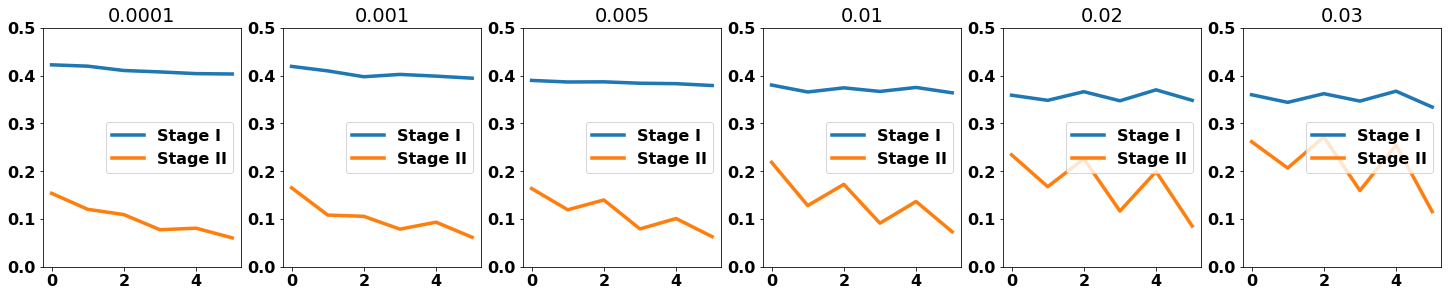

In [64]:
fig, ax = plt.subplots(1,len(metric_event.keys()), figsize = (20,4))
for idx, key in enumerate(metric_event.keys()):
    x_ratio_stage_one = [np.mean(np.abs(metric_event[key]['x_ratio_stage_one'][key_])) for key_ in att_keys]
    x_ratio_stage_two = [np.mean(np.abs(metric_event[key]['x_ratio_stage_two'][key_])) for key_ in att_keys]
    ax[idx].plot(x_ratio_stage_one, label = 'Stage I')
    ax[idx].plot(x_ratio_stage_two, label = 'Stage II')
    ax[idx].set_ylim((0,0.5))
    ax[idx].legend(loc = 'right')
    ax[idx].set_title(key)

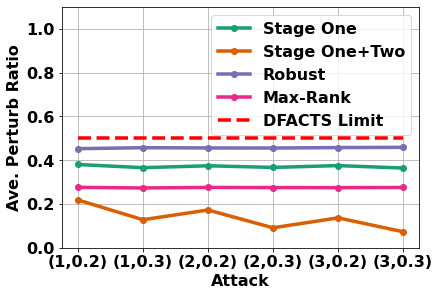

In [76]:
x_ratio_stage_one = [np.mean(np.abs(metric_event['0.01']['x_ratio_stage_one'][key_])) for key_ in att_keys]
x_ratio_stage_two = [np.mean(np.abs(metric_event['0.01']['x_ratio_stage_two'][key_])) for key_ in att_keys]

plt.figure()
plt.plot(x_ratio_stage_one, label = 'Stage One', marker = 'o', color = cm.Dark2(0))
plt.plot(x_ratio_stage_two, label = 'Stage One+Two', marker = 'o', color = cm.Dark2(1))
plt.plot(np.array(X_AFTER_DDD_robust)/100, label = 'Robust', marker = 'o', linestyle = '-', color = cm.Dark2(2))
plt.plot(np.array(X_AFTER_DDD_max_rank)/100, label = 'Max-Rank', marker = 'o', linestyle = '-', color = cm.Dark2(3))
plt.hlines(xmin = 0, xmax = 5, y = 0.5, color = 'red', linestyle = '--', label = 'DFACTS Limit')
plt.grid()

plt.ylim(0,1.1)
plt.xticks(range(0,6), xtickslabel)
plt.ylabel('Ave. Perturb Ratio')
plt.xlabel('Attack')
plt.legend(loc = 'best')
plt.savefig(f'figures/{sys_config["case_name"]}/x_ratio.pdf')
plt.show()

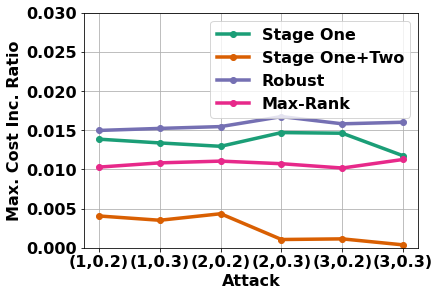

In [77]:
# Cost
cost_mtd_one_no_mtd = [metric_event['0.01']['cost_no_mtd'][key] for key in att_keys]
cost_mtd_one = [metric_event['0.01']['cost_with_mtd_one'][key] for key in att_keys]
cost_mtd_two = [metric_event['0.01']['cost_with_mtd_two'][key] for key in att_keys]

mtd_one_increase_ratio = [np.max((np.array(cost_mtd_one[i]) - np.array(cost_mtd_one_no_mtd[i]))/np.array(cost_mtd_one_no_mtd[i])) for i in range(len(cost_mtd_one_no_mtd))]
mtd_two_increase_ratio = [np.max((np.array(cost_mtd_two[i]) - np.array(cost_mtd_one_no_mtd[i]))/np.array(cost_mtd_one_no_mtd[i])) for i in range(len(cost_mtd_one_no_mtd))]

plt.figure()
plt.plot(mtd_one_increase_ratio, marker = 'o', color = cm.Dark2(0), label = 'Stage One')
plt.plot(mtd_two_increase_ratio, marker = 'o', color = cm.Dark2(1),label = 'Stage One+Two')
plt.plot(np.array(COST_AFTER_DDD_robust)/100, marker = 'o', color = cm.Dark2(2),label = 'Robust')
plt.plot(np.array(COST_AFTER_DDD_max_rank)/100, marker = 'o', color = cm.Dark2(3),label = 'Max-Rank')
plt.grid()
plt.ylim(0,0.03)
plt.xticks(range(0,6), xtickslabel)
plt.ylabel('Max. Cost Inc. Ratio')
plt.xlabel('Attack')
plt.legend(loc = 'upper right')
plt.savefig(f'figures/{sys_config["case_name"]}/cost.pdf')

In [78]:
# average performance of DDET-MTD
DDET_MTD_TPR = np.array(TPR_DDD) * np.array(mtd_stage_two_eff[idx])
DDET_MTD_HIDDEN = np.array(mtd_stage_two_hidden[idx]) + 1 - np.array(TPR_DDD)
DDET_MTD_COST = [np.sum((np.array(cost_mtd_two[i]) - np.array(cost_mtd_one_no_mtd[i]))/np.array(cost_mtd_one_no_mtd[i]))/200 for i in range(len(cost_mtd_one_no_mtd))]
DDRT_MTD_X = [np.sum(np.mean(np.abs(metric_event['0.01']['x_ratio_stage_two'][key_]), axis = 1))/200 for key_ in att_keys]
print("DDET_MTD_TPR: ", DDET_MTD_TPR*100, "\nDDET_MTD_HIDDEN: ", DDET_MTD_HIDDEN*100, "\nDDET_MTD_COST: ", np.array(DDET_MTD_COST)*100, "\nDDRT_MTD_X: ", np.array(DDRT_MTD_X)*100)

DDET_MTD_TPR:  [ 75.5  84.5  95.5 100.  100.  100. ] 
DDET_MTD_HIDDEN:  [41.24522293 64.         34.72916667 67.         45.         81.        ] 
DDET_MTD_COST:  [ 0.01764063  0.00757513  0.01153215 -0.00087401  0.00163991  0.0009098 ] 
DDRT_MTD_X:  [17.15628757 11.01002874 16.56455514  9.12285513 13.664099    7.32948738]


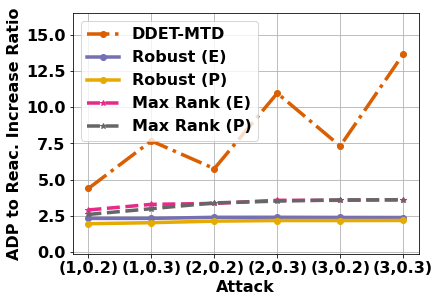

In [83]:
plt.plot(np.array(DDET_MTD_TPR)/np.array(DDRT_MTD_X), label = 'DDET-MTD', linestyle = '-.',marker='o', color = cm.Dark2(1))

plt.plot(np.array(ADP_summary_robust_event)/np.array(X_summary_robust_event)*1.1, label = 'Robust (E)', linestyle = '-',marker='o', color = cm.Dark2(2))
plt.plot(np.array(ADP_summary_robust_perio)/np.array(X_summary_robust_perio), label = 'Robust (P)', linestyle = '-',marker='o', color = cm.Dark2(5))

plt.plot(np.array(ADP_summary_max_rank_event)/np.array(X_summary_max_rank_event), label = 'Max Rank (E)', linestyle = '--',marker='*', color = cm.Dark2(3))
plt.plot(np.array(ADP_summary_max_rank_perio)/np.array(X_summary_max_rank_perio), label = 'Max Rank (P)', linestyle = '--',marker='*', color = cm.Dark2(7))

plt.legend(loc = 'upper left')
plt.xticks(range(0,6), xtickslabel)
plt.ylabel('ADP to Reac. Increase Ratio')
plt.ylim((-0.1,16.5))
plt.grid()
plt.xlabel('Attack')
plt.savefig(f'figures/{sys_config["case_name"]}/ADP_X.pdf')

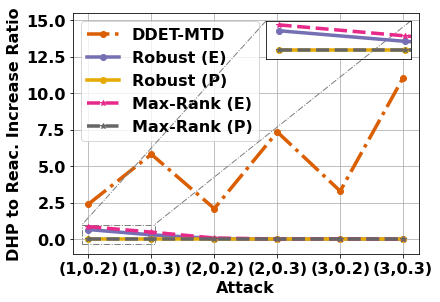

In [88]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
fig, ax = plt.subplots()
ax.plot(np.array(DDET_MTD_HIDDEN)/np.array(DDRT_MTD_X), label = 'DDET-MTD', linestyle = '-.',marker='o', color = cm.Dark2(1))

ax.plot(np.array(DHP_summary_robust_event)/np.array(X_summary_robust_event), label = 'Robust (E)', linestyle = '-',marker='o', color = cm.Dark2(2))
ax.plot(np.array(DHP_summary_robust_perio)/np.array(X_summary_robust_perio), label = 'Robust (P)', linestyle = '-',marker='o', color = cm.Dark2(5))

ax.plot(np.array(DHP_summary_max_rank_event)/np.array(X_summary_max_rank_event), label = 'Max-Rank (E)', linestyle = '--',marker='*', color = cm.Dark2(3))
ax.plot(np.array(DHP_summary_max_rank_perio)/np.array(X_summary_max_rank_perio), label = 'Max-Rank (P)', linestyle = '--',marker='*', color = cm.Dark2(7))

axins = zoomed_inset_axes(ax, 2, loc=1)
axins.set_xlim((-0.1, 1.05))
axins.set_ylim(-0.3, 1)
axins.get_yaxis().set_visible(False)
axins.get_xaxis().set_visible(False)
axins.plot(np.array(DHP_summary_robust_event)/np.array(X_summary_robust_event), linestyle = '-',marker='o', color = cm.Dark2(2))
axins.plot(np.array(DHP_summary_robust_perio)/np.array(X_summary_robust_perio), linestyle = '-',marker='o', color = cm.Dark2(5))
axins.plot(np.array(DHP_summary_max_rank_event)/np.array(X_summary_max_rank_event), linestyle = '--',marker='*', color = cm.Dark2(3))
axins.plot(np.array(DHP_summary_max_rank_perio)/np.array(X_summary_max_rank_perio), linestyle = '--',marker='*', color = cm.Dark2(7))

mark_inset(ax, axins, loc1=1, loc2=2, fc="none", ec="0.5", ls = '-.')
ax.set_xticks(range(0,6), xtickslabel)
ax.set_ylabel('DHP to Reac. Increase Ratio')
ax.set_ylim((-1,15.5))
ax.grid()
ax.set_xlabel('Attack')
ax.legend(loc = 'upper left')
fig.savefig(f'figures/{sys_config["case_name"]}/DHP_X.pdf')

## Duality gap and Convergence Analysis

Test the duality gap in stage one

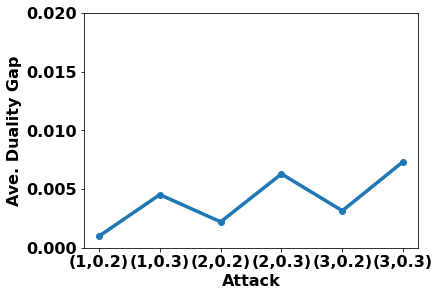

In [70]:
duality_gap = [np.abs(np.array(metric_event['0.01']['worst_primal'][key]) - np.array(metric_event['0.01']['worst_dual'][key])).mean() for key in att_keys]
plt.plot(duality_gap, marker = 'o')
plt.ylim((0,0.02))
plt.xticks(range(0,6), xtickslabel)
plt.ylabel('Ave. Duality Gap')
plt.xlabel('Attack')
plt.grid()
plt.savefig(f'figures/{sys_config["case_name"]}/duality_gap.pdf')
plt.grid()

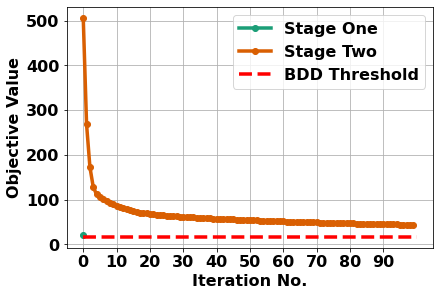

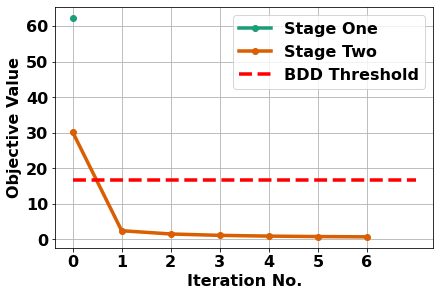

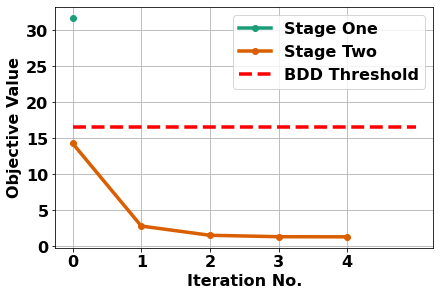

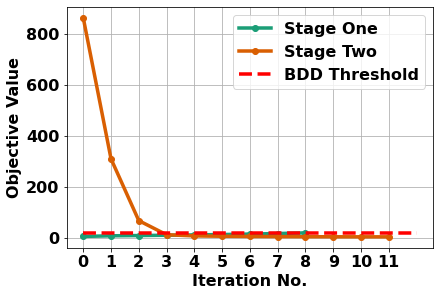

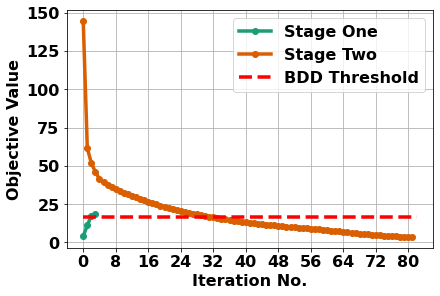

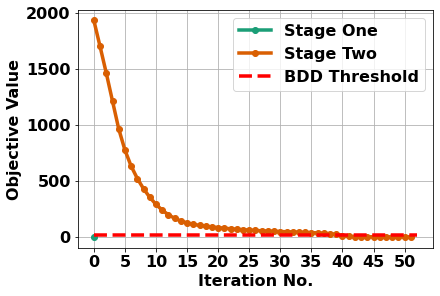

In [71]:
for i in range(len(va_strength)):
    plt.figure()
    plt.plot(omega_stage_one[i], marker = 'o', color = cm.Dark2(0), label = 'Stage One')
    plt.plot(omega_stage_two[i].flatten(), marker = 'o', color = cm.Dark2(1), label = 'Stage Two')
    tick_no = max(len(omega_stage_one[i]), len(omega_stage_two[i]))
    plt.hlines(y = case_class.bdd_threshold_pf, xmin = 0, xmax = tick_no, color = 'r', linestyle = '--', label = 'BDD Threshold')
    plt.legend(loc = 'upper right')
    reso = int(tick_no/10) if int(tick_no/10) else 1
    plt.xticks(np.arange(0, tick_no, reso))
    plt.grid()
    plt.ylabel('Objective Value')
    plt.xlabel('Iteration No.')
    plt.savefig(f'figures/{sys_config["case_name"]}/convergence_{va_strength[i]}.pdf')
    plt.show()

## False Positive Rejection

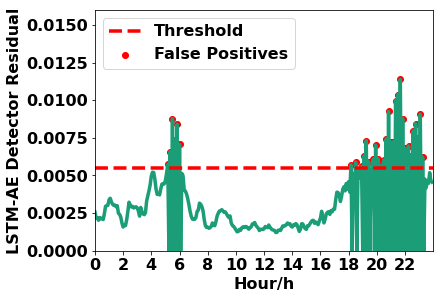

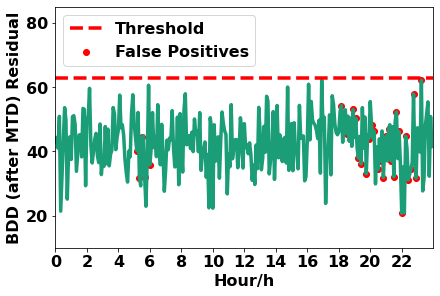

In [37]:
start_idx = 12*26
ddd_data = metric_fpr['residual_DDD'][start_idx:start_idx+288]
posi_idx = np.where(ddd_data >= dd_detector.ae_threshold[dd_detector.quantile_idx])
bdd_data = metric_fpr['residual_BDD'][start_idx:start_idx+288]

#plt.figure(figsize=(6,4), dpi = 200, constrained_layout=True)
plt.plot(ddd_data, color = cm.Dark2(0))
plt.hlines(y = dd_detector.ae_threshold[dd_detector.quantile_idx], xmin = 0, xmax = 288, color = 'red', label = 'Threshold', linestyles='--')
plt.xlim([0,288])
plt.ylim([0,0.016])
plt.scatter(posi_idx[0], np.array(ddd_data)[posi_idx[0]], color = 'red', label = 'False Positives')
plt.ylabel('LSTM-AE Detector Residual')
plt.xlabel('Hour/h')
plt.xticks(range(0,288,24), [i for i in range(0,24,2)]) 
plt.legend(loc = 'upper left')
plt.savefig(f'figures/{sys_config["case_name"]}/ddd_fpr.pdf')
plt.show()

#plt.figure(figsize=(6,4), dpi = 200, constrained_layout=True)
plt.plot(bdd_data, color = cm.Dark2(0))
plt.hlines(y = case_class.bdd_threshold, xmin = 0, xmax = 288, color = 'red', label = 'Threshold', linestyles='--')
plt.scatter(posi_idx[0], np.array(bdd_data)[posi_idx[0]], color = 'red', label = 'False Positives')
plt.xlim([0,288])
plt.ylim([10,85])
plt.ylabel('BDD (after MTD) Residual')
plt.xlabel('Hour/h')
plt.xticks(range(0,288,24), [i for i in range(0,24,2)]) 
plt.legend(loc = 'upper left')
plt.savefig(f'figures/{sys_config["case_name"]}/bdd_fpr.pdf')
plt.show()

## Without Attack

In [73]:
max_cost_increase = np.max((np.array(metric_fpr['cost_with_mtd']) - np.array(metric_fpr['cost_no_mtd']))/np.array(metric_fpr['cost_no_mtd']))
ave_cost_increase = np.mean((np.array(metric_fpr['cost_with_mtd']) - np.array(metric_fpr['cost_no_mtd']))/np.array(metric_fpr['cost_no_mtd']))
print(f'The maximum cost increase: {max_cost_increase* 100}')
print(f'The average cost increase: {ave_cost_increase* 100}')

ave_x_ratio = np.mean(np.abs(metric_fpr['x_mtd_ratio']), axis = 1)
print(f'Average reactance change ratio: {np.sum(ave_x_ratio)/2880*100}')

print(f'DDD FPR: {np.sum(metric_fpr["residual_DDD"] >= dd_detector.ae_threshold[dd_detector.quantile_idx])/len(metric_fpr["residual_DDD"])}')
print(f'BDD FPR: {np.sum(metric_fpr["residual_BDD"] >= case_class.bdd_threshold)/len(metric_fpr["residual_BDD"])}')

The maximum cost increase: 6.154042459155767
The average cost increase: 0.005488549217237626
Average reactance change ratio: 2.334549471484401
DDD FPR: 0.1
BDD FPR: 0.01840277777777778


In [74]:
print(f'ave. iden. time: {np.mean(metric_event["0.01"]["recovery_time"])}')
print(f'ave. I time: {np.mean(metric_event["0.01"]["mtd_stage_one_time"])}')
print(f'ave. II time: {np.mean(metric_event["0.01"]["mtd_stage_two_time"])}')

ave. iden. time: 1.662178612521033
ave. I time: 2.031730021035214
ave. II time: 18.070507184614783
